In [31]:
import TextToSpeechFromImage as tts
import cv2
import matplotlib.pyplot as plt 

In [32]:
def display_image(image) -> None:
    """
    Displays the original image using Matplotlib.

    Parameters
    ----------
    None

    Returns
    -------
    None
    """
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(rgb_image, cmap=None)
    plt.axis('off')
    plt.show()

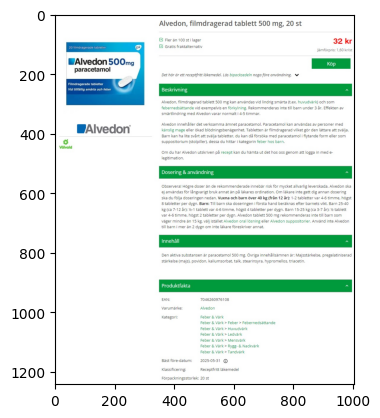

In [33]:
image_path = 'medicin#2.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.axis('off')
plt.show()

In [52]:
roi_coordinates = {}
x = 340
width = 660

roi_coordinates['TITEL'] = (x,0,width-50,50)
roi_coordinates['PRIS'] = (900,70,150,70)
roi_coordinates['BILD'] = (30,100,270,250)
roi_coordinates['BESKRIVNING'] = (x,230,width,280)
roi_coordinates['ANVÄNDNING'] = (x,510,width,240)
roi_coordinates['INNEHÅLL'] = (x,750,width,150)
roi_coordinates['PRODUKTFAKTA'] = (x,900,width,400)


In [53]:
rois = tts.MedicinePackageAnalyzer.divide_rois(image,roi_coordinates)

In [54]:
print(rois['TITEL'][0])

[[247 247 247]
 [247 247 247]
 [247 247 247]
 ...
 [247 247 247]
 [247 247 247]
 [247 247 247]]


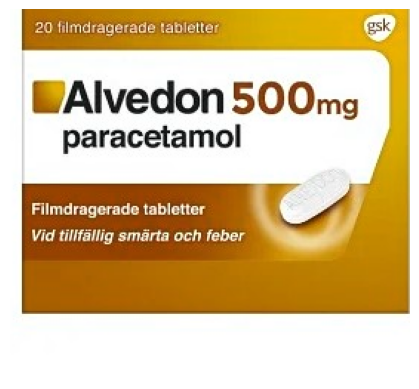

In [55]:
plt.imshow(rois['BILD'])
plt.axis('off')
plt.show()

In [38]:
# anal = tts.MedicinePackageAnalyzer(med_img_path,roi_coordinates)
# anal_image = anal.read_image(med_img_path)

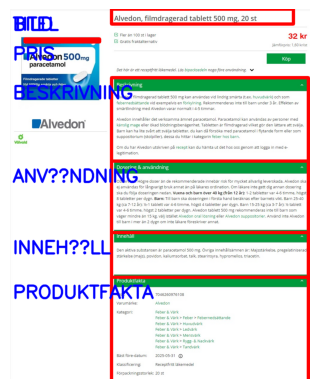

In [39]:
tts.MedicinePackageAnalyzer.view_rois(image, roi_coordinates)

In [40]:
# anal.divide_image()

In [41]:
# anal.sub_images

In [42]:
# sub_image_with_rectangles = tts.draw_rectangles(roi_coordinates=['TITLE'], roi_coordinates)

# Display the image with rectangles drawn around the ROIs using Matplotlib
# plt.imshow(cv2.cvtColor(sub_image_with_rectangles, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

In [43]:
# anal.extract_text_from_image()
# print(anal.extracted_text)

In [44]:
anal.find_title_and_info()

NameError: name 'anal' is not defined

In [ ]:
anal.generate_summary_text()

''